# Week 1 Project: Gapminder Scatter Plot
##### Brunno Gorgulho Soares

### Setup

In [23]:
# Load Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

### Getting data

In [24]:
data_cont = pd.read_csv("continents.csv", sep = ';')
data_fert = pd.read_csv("gapminder_total_fertility.csv")
data_lifeexp = pd.read_excel("gapminder_lifeexpectancy.xlsx")
data_pop = pd.read_excel("gapminder_population.xlsx")

### Inspect variables

In [25]:
# Continents table

print(df_cont['continent'].unique())
print(df_cont['country'].unique())
print(df_cont['country'].count())

['Africa' 'Asia' 'Europe' 'North America' 'Australia and Oceania'
 'South America']
['Algeria' 'Angola' 'Benin' 'Botswana' 'Burkina' 'Burundi' 'Cameroon'
 'Cape Verde' 'Central African Republic' 'Chad' 'Comoros' 'Congo'
 'Congo, Democratic Republic of' 'Djibouti' 'Egypt' 'Equatorial Guinea'
 'Eritrea' 'Ethiopia' 'Gabon' 'Gambia' 'Ghana' 'Guinea' 'Guinea-Bissau'
 'Ivory Coast' 'Kenya' 'Lesotho' 'Liberia' 'Libya' 'Madagascar' 'Malawi'
 'Mali' 'Mauritania' 'Mauritius' 'Morocco' 'Mozambique' 'Namibia' 'Niger'
 'Nigeria' 'Rwanda' 'Sao Tome and Principe' 'Senegal' 'Seychelles'
 'Sierra Leone' 'Somalia' 'South Africa' 'South Sudan' 'Sudan' 'Swaziland'
 'Tanzania' 'Togo' 'Tunisia' 'Uganda' 'Zambia' 'Zimbabwe' 'Afghanistan'
 'Bahrain' 'Bangladesh' 'Bhutan' 'Brunei' 'Burma (Myanmar)' 'Cambodia'
 'China' 'East Timor' 'India' 'Indonesia' 'Iran' 'Iraq' 'Israel' 'Japan'
 'Jordan' 'Kazakhstan' 'Korea, North' 'Korea, South' 'Kuwait' 'Kyrgyzstan'
 'Laos' 'Lebanon' 'Malaysia' 'Maldives' 'Mongolia' 'Nepa

In [26]:
# Fertility table

df_fert

,country,year,fertility rate
1,Afghanistan,1800,7.00
3,Albania,1800,4.60
4,Algeria,1800,6.99
7,Angola,1800,6.93
9,Antigua and Barbuda,1800,5.00
...,...,...,...
56150,Vietnam,2015,1.70
56151,Virgin Islands (U.S.),2015,2.45
56154,Yemen,2015,3.83
56156,Zambia,2015,5.59


### Data wrangling

In [38]:
# convert wide to long format, drop na's

# Continents table
df_cont = data_cont

# Fertility Rate table
df_fert = pd.melt(data_fert,id_vars = 'Total fertility rate').dropna()
df_fert.columns = ['country', 'year', 'fertility rate']
df_fert = df_fert.astype({'year': 'int', 'fertility rate': 'float'})

# Life Expectancy table
df_lifeexp = pd.melt(data_lifeexp, id_vars = "Life expectancy").dropna()
df_lifeexp.columns = ['country', 'year', 'life expectancy']
df_lifeexp = df_lifeexp.astype({'year': 'int', 'life expectancy': 'float'})

# Population table
df_pop = pd.melt(data_pop, id_vars = 'Total population').dropna()
df_pop.columns = ['country', 'year', 'total population']
df_pop = df_pop.astype({'year': 'int', 'total population': 'int'})

print(
    'df_fert shape:', df_fert.shape,
    '\ndf_lifeexp shape:', df_lifeexp.shape,
    '\ndf_pop shape', df_pop.shape
    )

df_fert shape: (43412, 3) 
df_lifeexp shape: (43857, 3) 
df_pop shape (20176, 3)


### Merge

In [39]:
df_submerge1 = pd.merge(df_fert, df_lifeexp, how = "left", on = ['country', 'year'])
df_submerge2 = pd.merge(df_submerge1, df_pop, how = "left", on = ['country', 'year'])
df_merge = pd.merge(df_submerge2, df_cont, how = 'left', on = 'country')

print(
    df_merge.head(), 
    "\n" + str(df_merge.shape)
    )

               country  year  fertility rate  life expectancy  \
0          Afghanistan  1800            7.00            28.21   
1              Albania  1800            4.60            35.40   
2              Algeria  1800            6.99            28.82   
3               Angola  1800            6.93            26.98   
4  Antigua and Barbuda  1800            5.00            33.54   

   total population      continent  
0         3280000.0           Asia  
1          410445.0         Europe  
2         2503218.0         Africa  
3         1567028.0         Africa  
4           37000.0  North America   
(43412, 6)


### Sample Plots

In [40]:
# Parameters
country = 'Brazil'

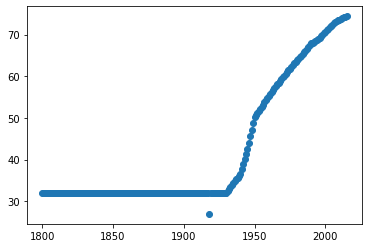

In [41]:
plt.scatter(df_merge[df_merge.country == country]['year'], df_merge[df_merge.country == country]['life expectancy'])

In [31]:
# Parameters
x = 'fertility rate'
y = 'life expectancy'
year = 2000

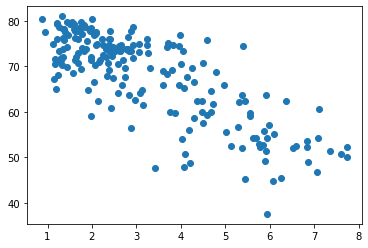

In [32]:
plt.scatter(df_merge[df_merge.year == year][x], df_merge[df_merge.year == year][y])

In [52]:
type(df_merge['total population'][0])

numpy.float64

KeyboardInterrupt: 

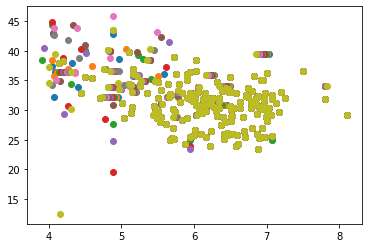

In [227]:
years = list(df_merge.year.unique())
for yr in years:
    plt.scatter(df_merge[df_merge.year == yr]['fertility rate'], df_merge[df_merge.year == yr]['life expectancy'])
    time.sleep(1)